# IBM HR Analytics Employee Attrition

An average company loses a lot of money in the time it takes to bring in and train a new employee. 

The HR department colleted an extensive data on their employees and the goal is to find which employees are more likely to quit.

They provided an extensive dataset:


The dataset includes a lot of information:
- Age.
- Attrition (whether they're burnt or not).
- Daily rate (income).
- Department.
- Distance from home. Maybe the commute has an affect on the happiness of the employee.
- Job involvement.
- Level of education.
- Envionrenment Satisfaction.
- Marital status. Single people might be more likely to leave.
- Job role.
- Stock option level: some companies give you stocks on top of your salary, but they usually put a lock on you (you cannot cash them out before a period).
- Work life balance.
- Number of years with the company.

And many more.

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You have to include the full link to the csv file containing your dataset
employee_df = pd.read_csv('Human_Resources.csv')

In [3]:
employee_df.shape

(1470, 35)

In [4]:
employee_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [66]:
employee_df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


We will first use the the methods describe and info to look at a summery of the data:

- We can see that there are no null values.
- We can see that for example, EmployeeCount is useless. All records are 1.

In [67]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [68]:
print('Object columns:')
print(employee_df.dtypes[employee_df.dtypes == 'object'].index)

print('int64 columns:')
print(employee_df.dtypes[employee_df.dtypes == 'int64'].index)

Object columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
int64 columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [69]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There are some that we can directly drop. For example, EmployeeCount is useless (the're all 1).

In [70]:
print(f' The number of unique values of EmployeeCount is {len(employee_df["EmployeeCount"].unique())}')
print(f' The number of unique values of Over18 is {len(employee_df["Over18"].unique())}')
print(f' The number of unique values of StandardHours is {len(employee_df["StandardHours"].unique())}')



 The number of unique values of EmployeeCount is 1
 The number of unique values of Over18 is 1
 The number of unique values of StandardHours is 1


## Exploratory analysis


In [71]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations 
employee_df = pd.get_dummies(employee_df, columns = ['Over18', 'Attrition', 'OverTime'] ,drop_first = True)

In [72]:
employee_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,OverTime_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0


In [73]:
employee_df.shape

(1470, 34)

Note that since Over18 only had one possible values, the column has been dropped. pd.get_dummies generates a column for Over18 which is dropped with the option ``drop_first = True``.

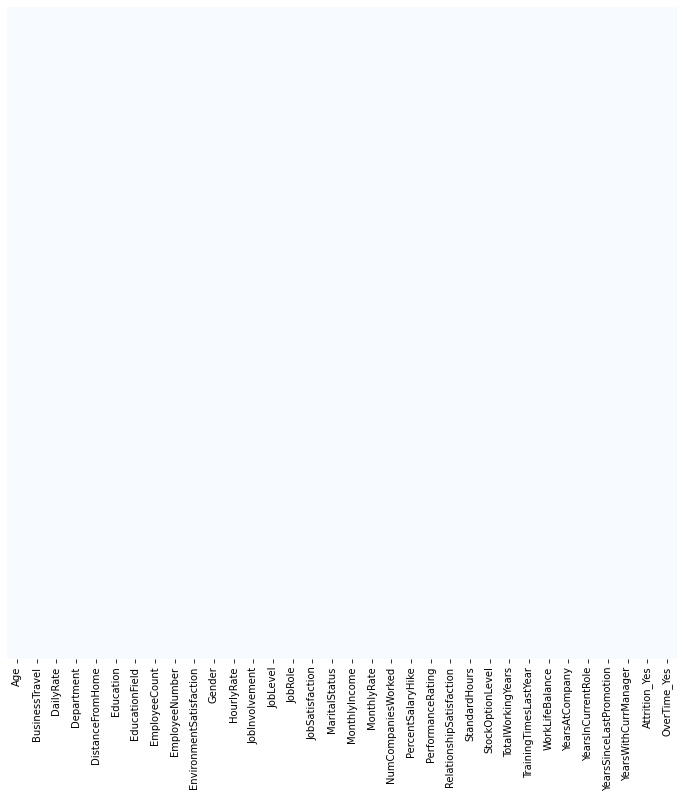

In [74]:
# We could also have checked if we had missing data with a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar = False, cmap='Blues');

Let's plot the histogram:

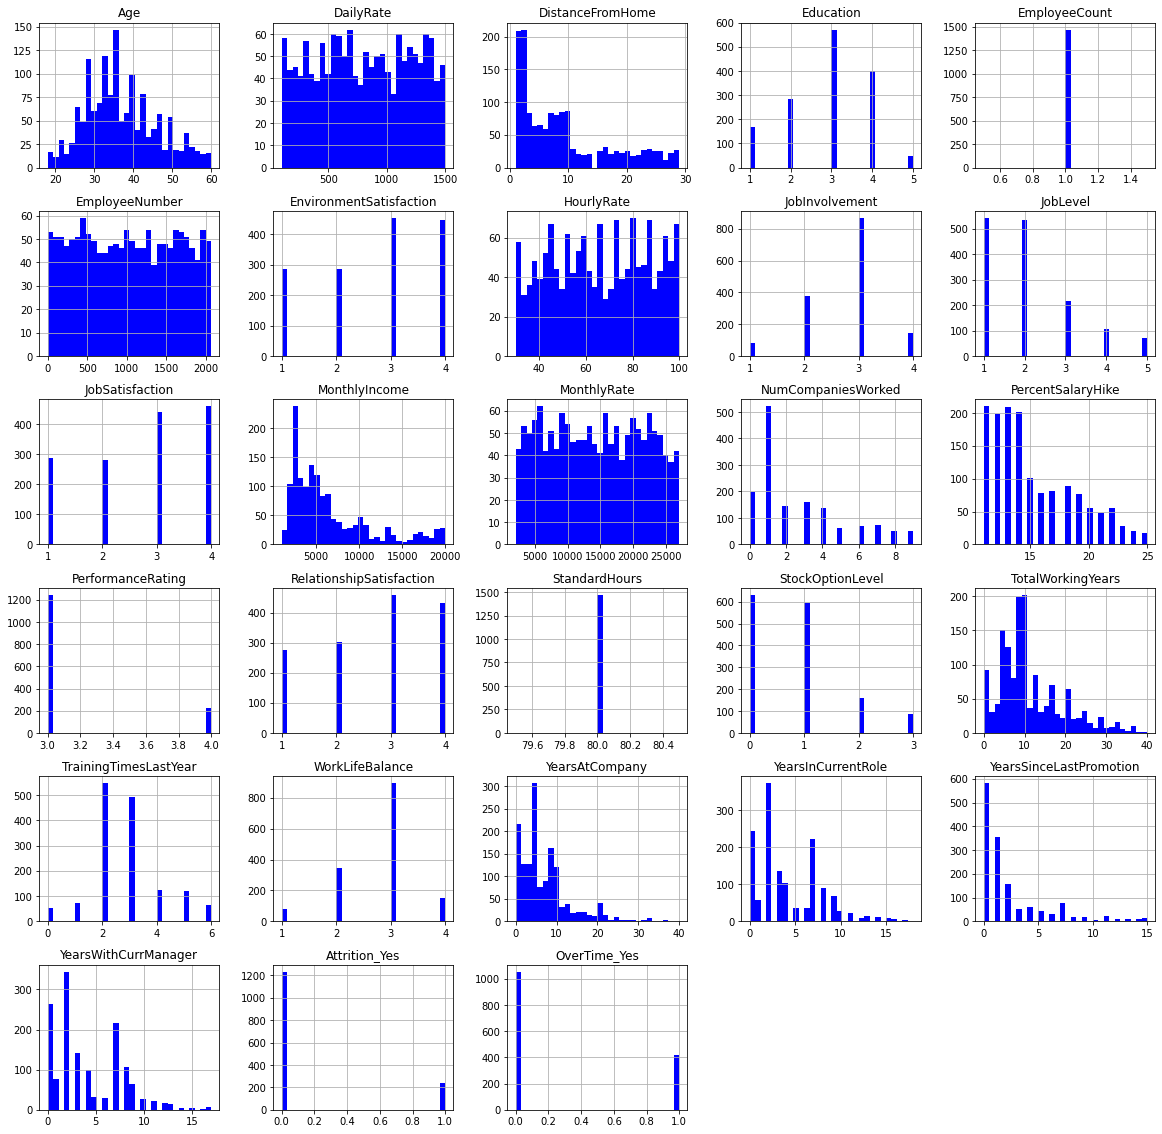

In [75]:
employee_df.hist(bins = 30, figsize=(20,20), color = 'b');

In [76]:

# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other
employee_df.drop(['EmployeeCount','StandardHours'], axis = 1, inplace = True)

In [77]:

# Let's drop 'EmployeeNumber' as well. It is a random number to every employee. It doesn't carry information.
employee_df.drop(['EmployeeNumber'], axis= 1, inplace = True)

In [78]:
employee_df.rename(columns = {'Attrition_Yes':'Attrition', 'OverTime_Yes':'OverTime'}, inplace = True)

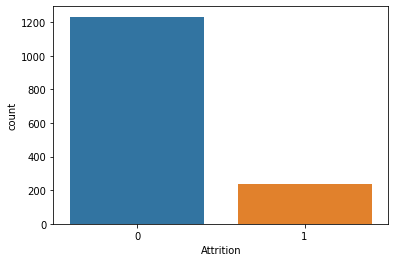

In [79]:
# Let's see how many employees left the company! 
sns.countplot(data = employee_df, x = 'Attrition')

In [80]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
stayed = employee_df[employee_df['Attrition'] == 0]
left = employee_df[employee_df['Attrition'] == 1]
print(f'Total lefth: {len(left)}, Percentage = {len(left)/len(employee_df)*100}%')
print(f'Total stayed: {len(stayed)}, Percentage = {len(stayed)/len(employee_df)*100}%')

Total lefth: 237, Percentage = 16.122448979591837%
Total stayed: 1233, Percentage = 83.87755102040816%


In [81]:
left.describe()

#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,OverTime
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,1.0,0.535865
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349,0.0,0.499768
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.0,1.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000,1.0,1.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000,1.0,1.000000


In [82]:
stayed.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,OverTime
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.0,0.234388
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,0.0,0.423787
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.0,0.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,0.0,0.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.0,0.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,0.0,1.000000


Let's look at the correlation of the data to see what we can find. A visual way is to represent the correlation matrix using a heatmap.



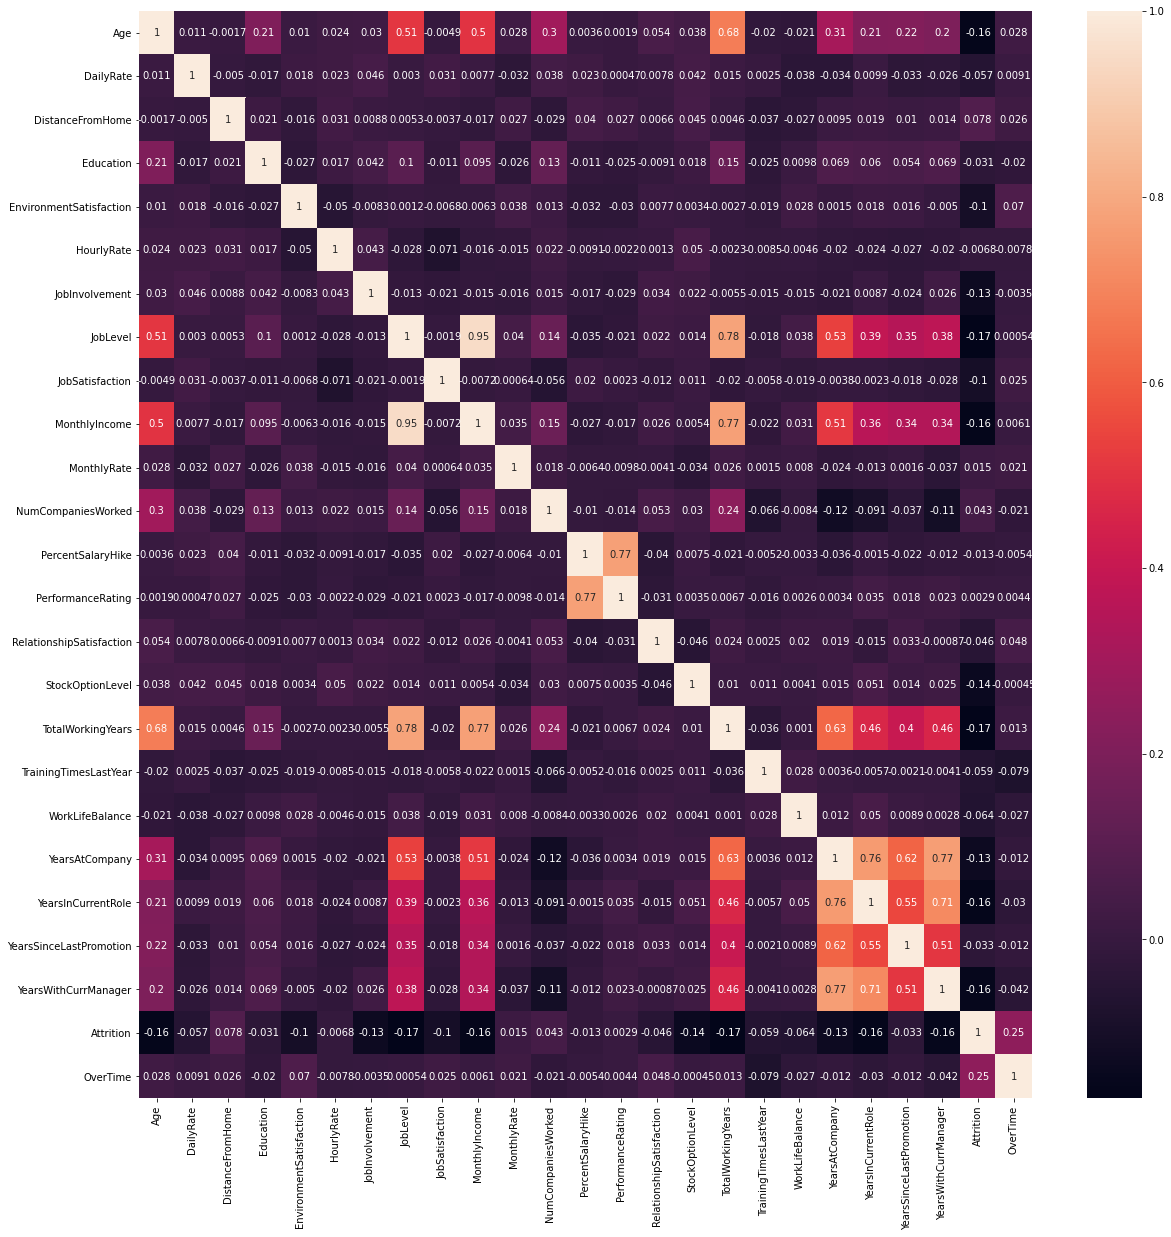

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(employee_df.corr(), yticklabels=True, annot = True)

There is some expected behaviour like:
- Age is highly correlated (corr > |0.5|) to: Job level, monthly income, total working years. Nothing unexpected here.
- High correlation (corr > |0.7|) between job level and monthly income, years at the company and years with the current manager etc.


If we just focus at the correlation with Attrition we can see that:
- The maximum positive correlation is with Overtime. The more overtime they do, the more likely they are to leave the company.
- The rest of the relevant correlations (corr < -0.1) are related to the age, time they have worked, job level and monthly income.

All these makes a lot of sense, the less they make and the younger they are, the easiest it is to change jobs.

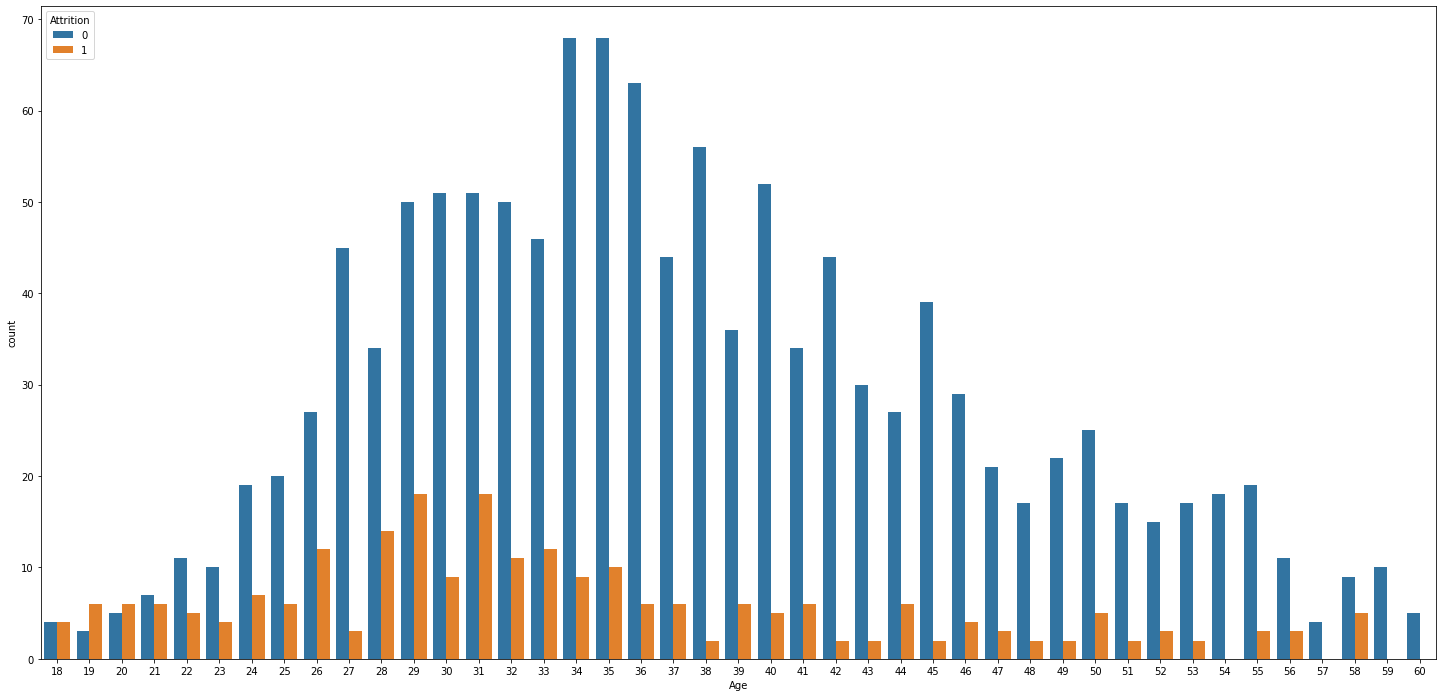

In [84]:
plt.figure(figsize = [25,12])
sns.countplot(data = employee_df, x = 'Age', hue= 'Attrition')

We already had this information, it is another way to visualize it. When people reach 28-29 they leave the company more.

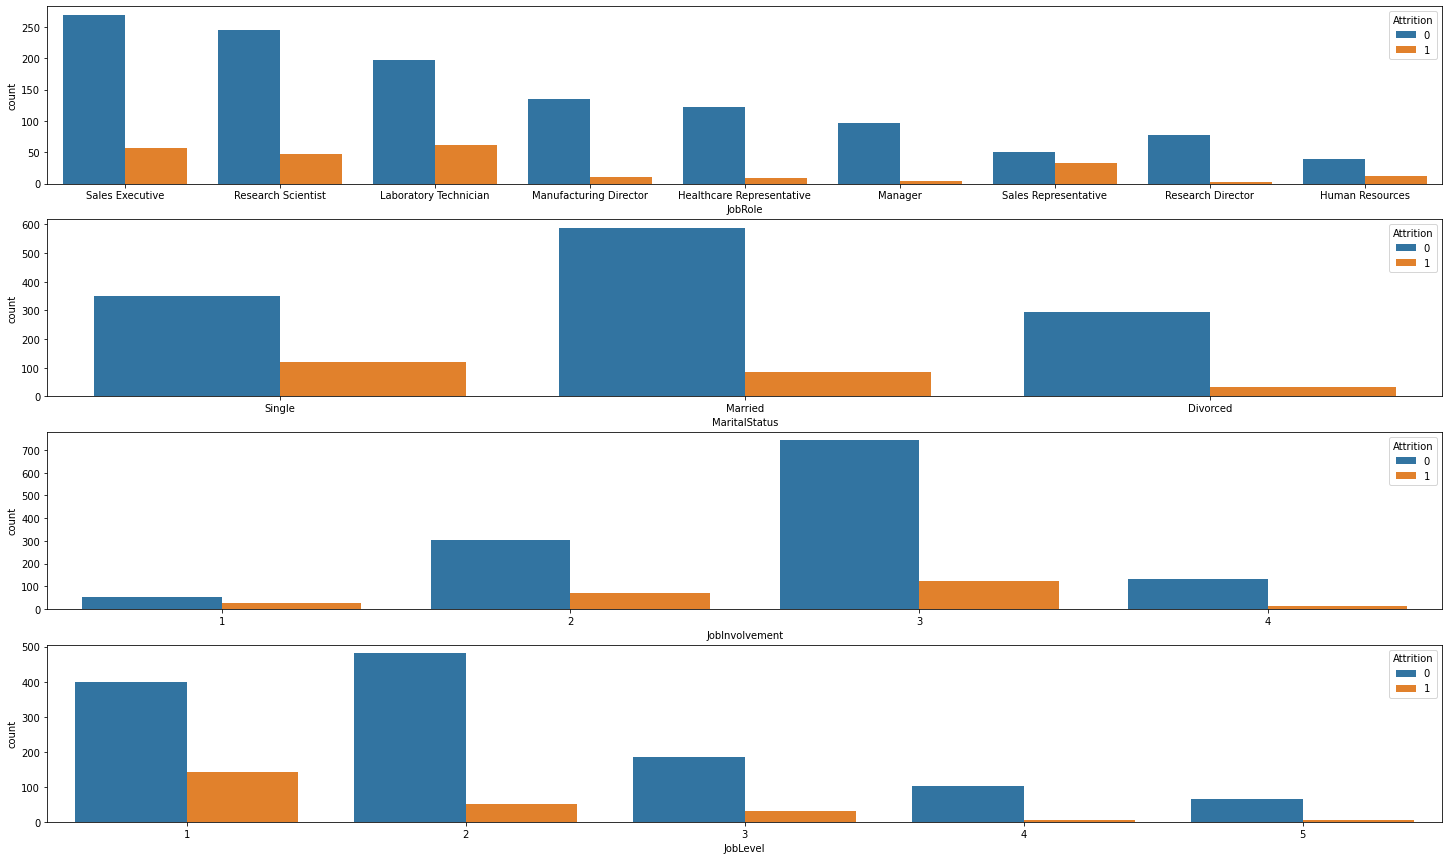

In [85]:
plt.figure(figsize = [25,15])
plt.subplot(411)
sns.countplot(data = employee_df, x = 'JobRole', hue = 'Attrition')


plt.subplot(412)
sns.countplot(data = employee_df, x = 'MaritalStatus', hue = 'Attrition')

plt.subplot(413)
sns.countplot(data = employee_df, x = 'JobInvolvement', hue = 'Attrition')

plt.subplot(414)
sns.countplot(data = employee_df, x = 'JobLevel', hue = 'Attrition')

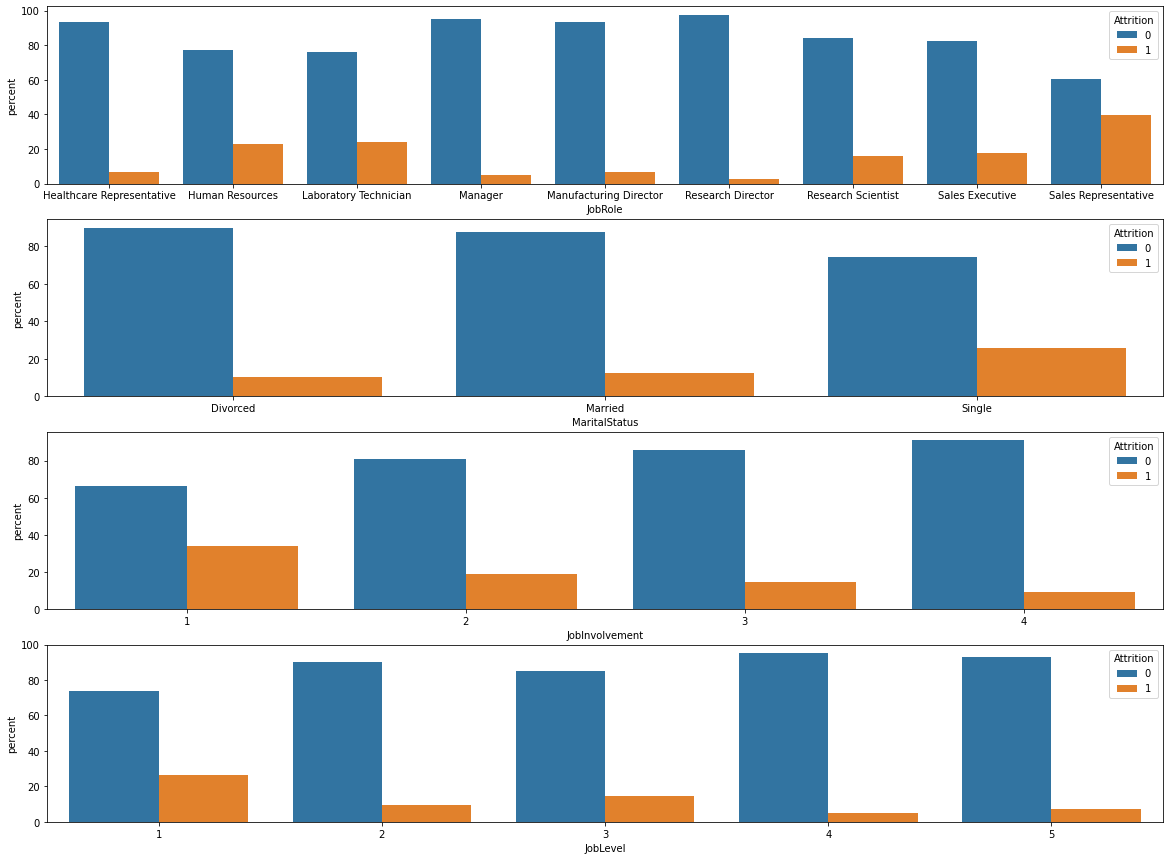

In [134]:
# If we repeat the same analysis but showing the percentages it is easier to draw conclusions
plt.figure(figsize = [20,15])
plt.subplot(411)
data = employee_df.groupby('JobRole')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'JobRole', y = 'percent', hue = 'Attrition');


plt.subplot(412)
data = employee_df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'MaritalStatus', y = 'percent', hue = 'Attrition');

plt.subplot(413)
data = employee_df.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'JobInvolvement', y = 'percent', hue = 'Attrition');


plt.subplot(414)
data = employee_df.groupby('JobLevel')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'JobLevel', y = 'percent', hue = 'Attrition');


There are some obvious things:
- Single employees leave more.
- Less experienced people leave more.
- Less involved employees leave more.

So we can basically see what we suspected, but there are a few interesting things I hadn't noticed before:
- JobRole: People who work as sales representants tend to leave more.


Let us plot some more information, like BusinessTravel, Department, EducationField and Gender:

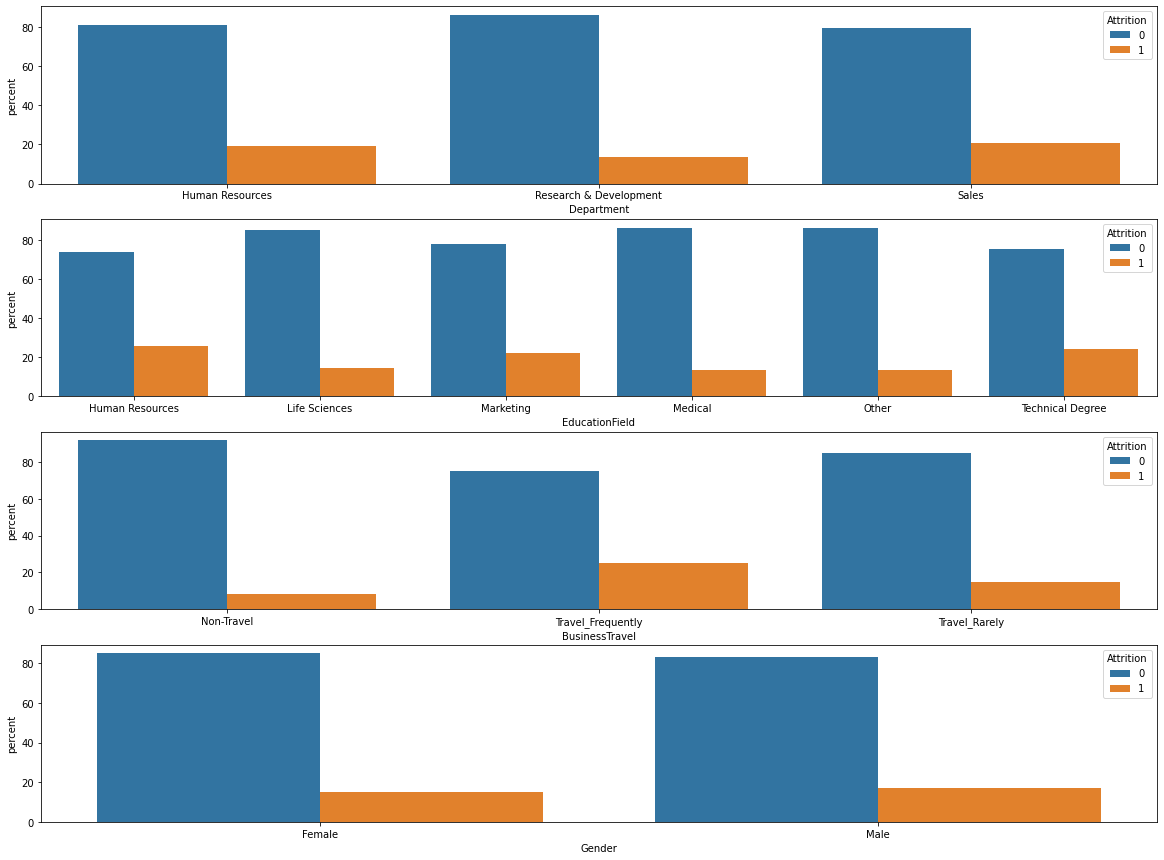

In [136]:
plt.figure(figsize=[20,15])
plt.subplot(411)
data = employee_df.groupby('Department')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'Department', y = 'percent', hue = 'Attrition');


plt.subplot(412)
data = employee_df.groupby('EducationField')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'EducationField', y = 'percent', hue = 'Attrition');


plt.subplot(413)
data = employee_df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'BusinessTravel', y = 'percent', hue = 'Attrition');

plt.subplot(414)
data = employee_df.groupby('Gender')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(data = data, x = 'Gender', y = 'percent', hue = 'Attrition');



We can see that:
- People who travel are more likely to quit.
- There isn't a gender difference.
- People from sales leave more often.

Let's performance some analysis on the continuos functions:

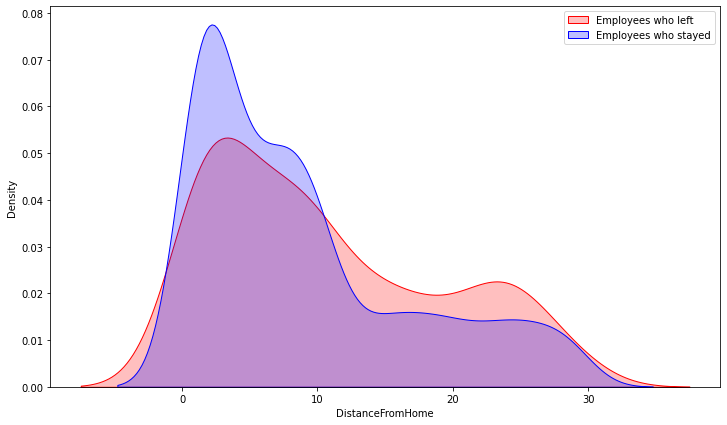

In [137]:
plt.figure(figsize=(12,7))

sns.kdeplot(left['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed['DistanceFromHome'], label = 'Employees who stayed', shade = True, color = 'b')
plt.legend()

**As the distance from home increases, employers are more likely to leave.**

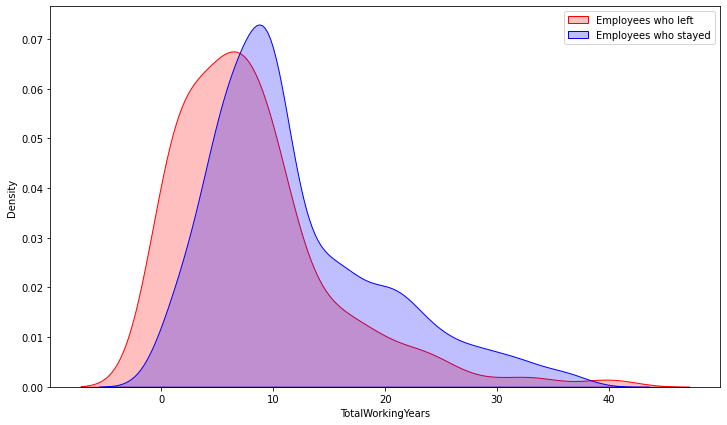

In [140]:

plt.figure(figsize=(12,7))

sns.kdeplot(left['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed['TotalWorkingYears'], label = 'Employees who stayed', shade = True, color = 'b')
plt.legend()

Again we can see that employers who quit have been working less years (they're usually younger).

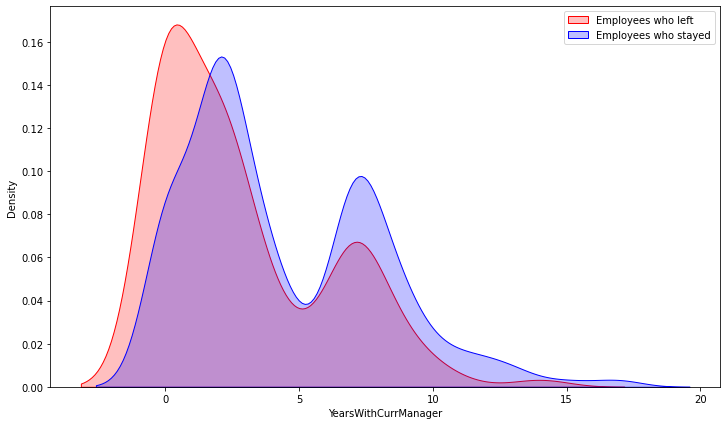

In [139]:

plt.figure(figsize=(12,7))

sns.kdeplot(left['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed['YearsWithCurrManager'], label = 'Employees who stayed', shade = True, color = 'b')
plt.legend()

We can see that employers who have been working with the same manager for less than 1-2 years are more likely to leave. This is what we would have expected. Young workers tend to switch companies more often and thus, those who quit, generally have been working with the team for a shorter amount of time.

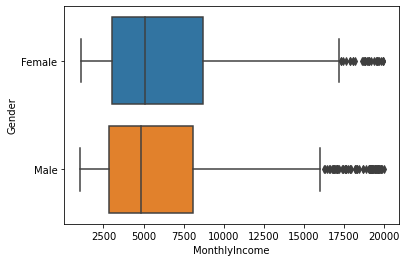

In [141]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

Women in general seem to be better paid than men. However, note that the outliers in men are more present, which indicates that **the top positions are occupied by men.**

In [147]:
men_in_charge = employee_df[(employee_df['Gender'] == 'Male') & (employee_df['MonthlyIncome']>17000)]
women_in_charge = employee_df[(employee_df['Gender'] == 'Female') & (employee_df['MonthlyIncome']>17000)]


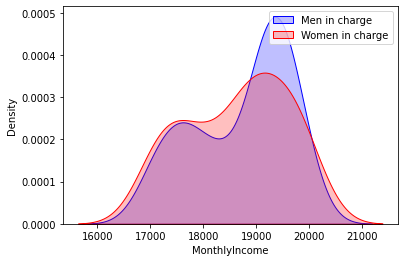

In [148]:
sns.kdeplot(x='MonthlyIncome', data = men_in_charge, shade = True, color ='b', label = 'Men in charge')
sns.kdeplot(x='MonthlyIncome', data = women_in_charge, shade = True, color ='r', label = 'Women in charge')
plt.legend()

In [149]:
men = employee_df[employee_df['Gender'] == 'Male']
nmen = len(men)
nwomen = len(employee_df) - nmen
print(f'The number of men in high salary positions (>17000): {len(men_in_charge)} of a total of {nmen} ({len(men_in_charge)/nmen * 100}%)')
print(f'The number of women in high salary positions (>17000): {len(women_in_charge)} of a total of {nwomen} ({len(women_in_charge)/nwomen * 100}%)')


The number of men in high salary positions (>17000): 63 of a total of 882 (7.142857142857142%)
The number of women in high salary positions (>17000): 34 of a total of 588 (5.782312925170068%)


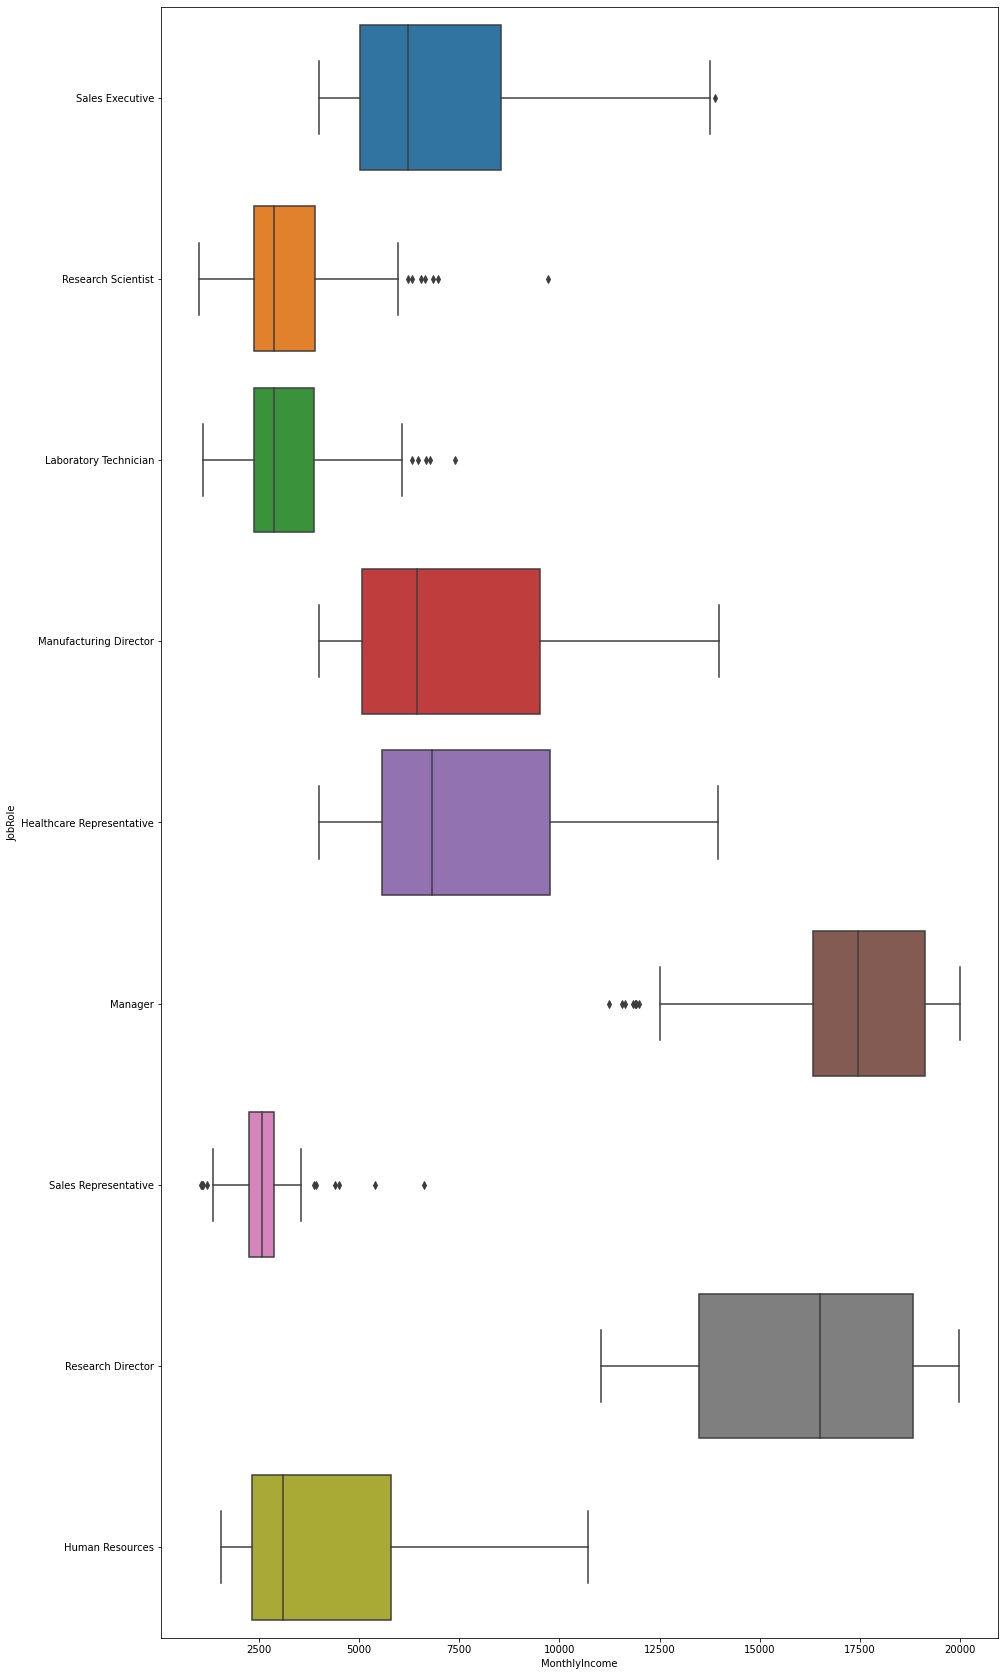

In [150]:
# Let's see the JobRole vs. Monthly Income
plt.figure(figsize=(15,30))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

We can clearly see who get the lowest salary:
- Research scientist.
- Sales Representative.
- Human Resources.
- Laboratory technician.

## Preparing data for ML

The first thing we have to do is convert the categorical columns to something most machine learning algorithms can use:

In [160]:
employee_df.dtypes[employee_df.dtypes == 'object']

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
dtype: object

In [161]:
x_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

We obviously have to encode these variables so that we can use them in a the models:

In [162]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
x_cat = encoder.fit_transform(x_cat).toarray()

In [163]:

x_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [164]:
x_cat.shape 

(1470, 26)

Now we have to convert it to a DataFrame:

In [165]:
X_cat = pd.DataFrame(x_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Now we have to add these dummy variables to the previous dataframe. Before doing so, we need to drop the categorical columns. Then we are ready to form our X and y matrices.

In [167]:
X_all = employee_df.drop(['BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis = 1)
X_all = pd.concat([X_cat, X_all], axis = 1)
y = employee_df['Attrition']
X_all.drop(['Attrition'], axis = 1, inplace = True)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,1
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0


Now we obviously have to normalize the data, otherwhise the columns that have high values would take over in the optimization and it would have a poor convergence. A great visual explanation on why can be found here: [why data normalization is important](https://www.youtube.com/watch?reload=9&v=UIp2CMI0748&ab_channel=intrigano).

In order to normalize the data we can use sklearn:


In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.29411765,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.06666667, 0.41176471,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.17647059,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.47058824,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.06666667, 0.11764706,
        0.        ]])

In [170]:
print(f'{X.min()} and {X.max()}')

0.0 and 1.0000000000000002


If we got new data, we would have to trasform it using the same parameters. This is automatically done by the MinMaxScaler object with the method .transform. However, these values can be found here:

In [174]:
print(f'{scaler.min_} and {scaler.data_range_}')

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.42857143 -0.0730136  -0.03571429 -0.25
 -0.33333333 -0.42857143 -0.33333333 -0.25       -0.33333333 -0.05313323
 -0.0840795   0.         -0.78571429 -3.         -0.33333333  0.
  0.          0.         -0.33333333  0.          0.          0.
  0.          0.        ] and [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 4.2000e+01 1.3970e+03 2.8000e+01 4.0000e+00
 3.0000e+00 7.0000e+01 3.0000e+00 4.0000e+00 3.0000e+00 1.8990e+04
 2.4905e+04 9.0000e+00 1.4000e+01 1.00

## Random Forest Classification

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)


(1102, 50)
(368, 50)


In [177]:
model = RandomForestClassifier(n_estimators=200, criterion='gini')
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
y_pred = model.predict(X_test)
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)*100} %')

The accuracy of the model is 87.77173913043478 %


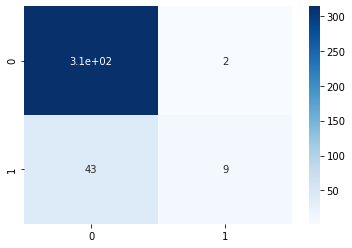

In [181]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, cmap = 'Blues', annot = True, yticklabels=True)

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       316
           1       0.82      0.17      0.29        52

    accuracy                           0.88       368
   macro avg       0.85      0.58      0.61       368
weighted avg       0.87      0.88      0.84       368



The results are not great. Despite that we get a classification accuracy of 0.88, the dataset is unbalanced. For class 1 the recall is 0.17. This means that: **when someone actually left the job, we only detected a 17%.**

Next we can see the feature importance for our Random forest classifier:

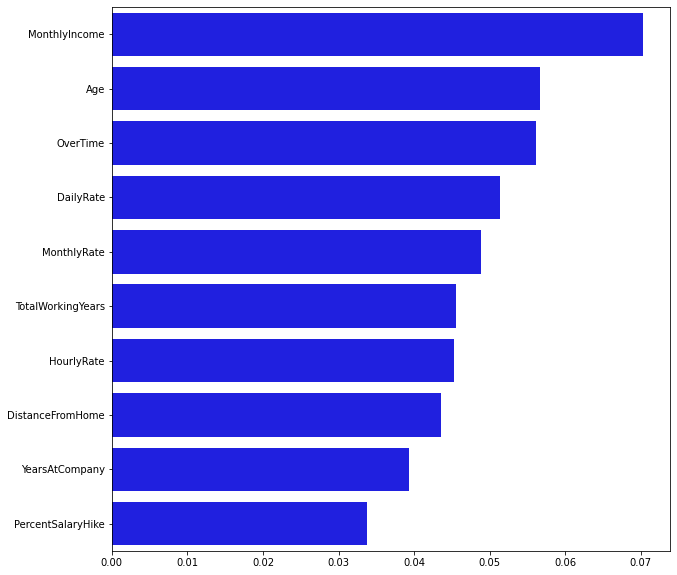

In [213]:
plt.figure(figsize = [10,10])
importances = model.feature_importances_
indices = np.argsort(-importances)
num_features = 10
sns.barplot(y = X_all.columns[indices][:num_features], x = importances[indices][:num_features], color = 'blue')